<a href="https://colab.research.google.com/github/dadalong666/2019-Python-Homework/blob/master/Q9_Claire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, Adamax, Adam
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_Train), (X_Test, y_Test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train_C = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_Test4_C = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

In [0]:
X_train_C_norm = X_train_C / 255
X_Test4_C_norm = X_Test4_C /255
  
y_TOH = np_utils.to_categorical(y_Train)
y_TestOH = np_utils.to_categorical(y_Test)

In [5]:
model = Sequential()

#第1層CNN&池化器
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#第2層CNN&池化器
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#Dropout層
model.add(Dropout(0))

#平坦層
model.add(Flatten())

#全連接層
model.add(Dense(10, activation='softmax'))

#顯示CNN架構
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dens

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.05), metrics=['accuracy'])
train_history_C1 = model.fit(x=X_train_C_norm, y=y_TOH, validation_split=0.2, epochs=20, batch_size=100, verbose=2)
score_C1 = model.evaluate(X_train_C, y_TOH)
print()
print("\t 準確度 = {:2.1f}%".format(score_C1[1]*100.0))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 8s - loss: 0.6236 - acc: 0.7990 - val_loss: 0.1384 - val_acc: 0.9571
Epoch 2/20
 - 2s - loss: 0.1351 - acc: 0.9579 - val_loss: 0.1192 - val_acc: 0.9638
Epoch 3/20
 - 2s - loss: 0.1172 - acc: 0.9638 - val_loss: 0.1426 - val_acc: 0.9566
Epoch 4/20
 - 2s - loss: 0.1042 - acc: 0.9673 - val_loss: 0.0978 - val_acc: 0.9713
Epoch 5/20
 - 2s - loss: 0.0946 - acc: 0.9714 - val_loss: 0.0971 - val_acc: 0.9709
Epoch 6/20
 - 2s - loss: 0.0900 - acc: 0.9718 - val_loss: 0.1007 - val_acc: 0.9698
Epoch 7/20
 - 2s - loss: 0.0834 - acc: 0.9741 - val_loss: 0.0921 - val_acc: 0.9718
Epoch 8/20
 - 2s - loss: 0.0827 - acc: 0.9746 - val_loss: 0.0899 - val_acc: 0.9743
Epoch 9/20
 - 2s - loss: 0.0712 - acc: 0.9782 - val_loss: 0.0979 - val_acc: 0.9718
Epoch 10/20
 - 2s - loss: 0.0688 - acc: 0.9789 - val_loss: 0.1043 - val_acc: 0.9681
Epoch 11/20
 - 2s - loss: 0.0654 - acc: 0.9798 - val_loss: 0.0799 - val

In [7]:
print("\t[Info] 從第120筆開始，顯示10筆預測結果:")  
X = X_Test4_C_norm[120:130]
prediction = model.predict_classes(X)
print(prediction)

	[Info] 從第120筆開始，顯示10筆預測結果:
[5 4 7 6 7 9 0 5 8 5]


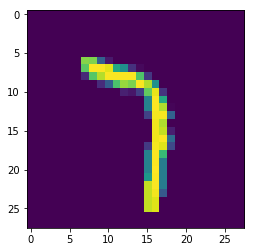

In [8]:
plt.imshow(X_Test[122])
plt.show()

### 第122筆好像是對的

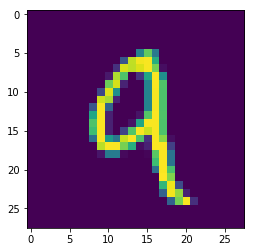

In [9]:
plt.imshow(X_Test[125])
plt.show()

### 第125筆肯定不對

#**所以filter設錯，基本上是毫無準度可言....Orz**

## 修正filter

In [10]:
modelC2 = Sequential()

#第1層CNN&池化器
modelC2.add(Conv2D(filters=24, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
modelC2.add(MaxPooling2D(pool_size=(3,3)))
  
#第2層CNN&池化器
modelC2.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
modelC2.add(MaxPooling2D(pool_size=(3,3)))

#Dropout層
modelC2.add(Dropout(1))

#平坦層
modelC2.add(Flatten())

#全連接層
modelC2.add(Dense(10, activation='softmax'))

#顯示CNN架構
modelC2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 24)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          19232     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2890      
Total para

In [11]:
modelC2.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.01), metrics=['accuracy'])
train_history_C2 = modelC2.fit(x=X_train_C_norm, y=y_TOH, validation_split=0.2, epochs=20, batch_size=100, verbose=2)
score_C2 = modelC2.evaluate(X_train_C, y_TOH)
print()
print("\t 準確度 = {:2.1f}%".format(score_C2[1]*100.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.1723 - acc: 0.9465 - val_loss: 0.0867 - val_acc: 0.9748
Epoch 2/20
 - 2s - loss: 0.0523 - acc: 0.9833 - val_loss: 0.0617 - val_acc: 0.9817
Epoch 3/20
 - 2s - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0526 - val_acc: 0.9849
Epoch 4/20
 - 2s - loss: 0.0300 - acc: 0.9904 - val_loss: 0.0524 - val_acc: 0.9847
Epoch 5/20
 - 2s - loss: 0.0246 - acc: 0.9917 - val_loss: 0.0401 - val_acc: 0.9880
Epoch 6/20
 - 2s - loss: 0.0198 - acc: 0.9936 - val_loss: 0.0363 - val_acc: 0.9895
Epoch 7/20
 - 2s - loss: 0.0169 - acc: 0.9945 - val_loss: 0.0346 - val_acc: 0.9902
Epoch 8/20
 - 2s - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0359 - val_acc: 0.9913
Epoch 9/20
 - 2s - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0488 - val_acc: 0.9882
Epoch 10/20
 - 2s - loss: 0.0085 - acc: 0.9970 - val_loss: 0.0414 - val_acc: 0.9899
Epoch 11/20
 - 2s - loss: 0.0065 - acc: 0.9979 - val_loss: 0.0386 - val_acc: 0.9908
Epoch 12/20
 - 2s - loss: 0.0054 - 

In [12]:
print("\t[Info] 從第120筆開始，顯示10筆預測結果:")  
X = X_Test4_C_norm[120:130]
prediction = modelC2.predict_classes(X)
print(prediction)

	[Info] 從第120筆開始，顯示10筆預測結果:
[5 4 7 6 7 9 0 5 8 5]


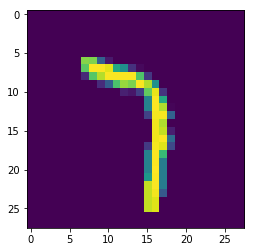

In [13]:
plt.imshow(X_Test[122])
plt.show()

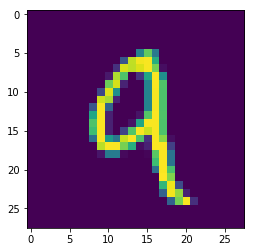

In [14]:
plt.imshow(X_Test[125])
plt.show()